 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_df = pd.read_csv('./resources/whale_returns.csv', index_col='Date', parse_dates=True)

In [4]:
# Count nulls
null_counts = whale_df.isnull().sum()
print(null_counts)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv("./algo_returns2.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
print(algo_df.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv('./resources/sp_tsx_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [10]:
# Check Data Types
print(sp_tsx_df.dtypes)

Close    object
dtype: object


In [11]:
sp_tsx_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [12]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
# Calculate Daily Returns
sp_tsx_df_daily_returns = sp_tsx_df['Close'].pct_change()
sp_tsx_df_daily_returns

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64

In [14]:
type(sp_tsx_df_daily_returns)

pandas.core.series.Series

In [15]:
# Drop nulls
sp_tsx_df_daily_returns.dropna(inplace=True)

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df_daily_returns = sp_tsx_df_daily_returns.rename("S&P TSX")

In [17]:
sp_tsx_df_daily_returns

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: S&P TSX, Length: 1817, dtype: float64

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
# Join all the DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp_tsx_df_daily_returns], axis='columns', join='inner')
# display(combined_df)
# Rename the columns
combined_df.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP_TSX']

combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [20]:
print(combined_df.columns)

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_TSX'],
      dtype='object')


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [21]:
# Calculate daily returns for all portfolios
daily_returns = combined_df

In [22]:
import matplotlib.pyplot as plt

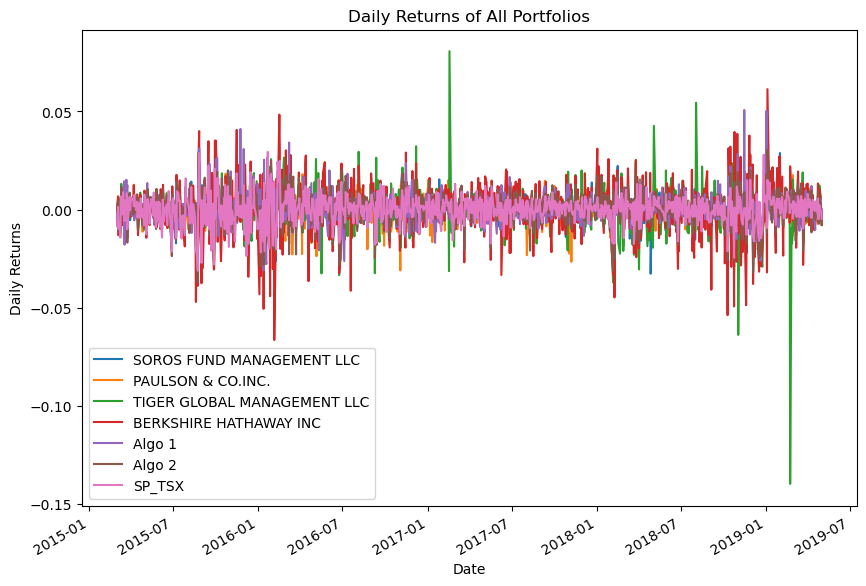

In [23]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10, 7))
plt.ylabel('Daily Returns')
plt.title('Daily Returns of All Portfolios')
plt.show()

#### Calculate and Plot cumulative returns.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [24]:
print(combined_df.columns)

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_TSX'],
      dtype='object')


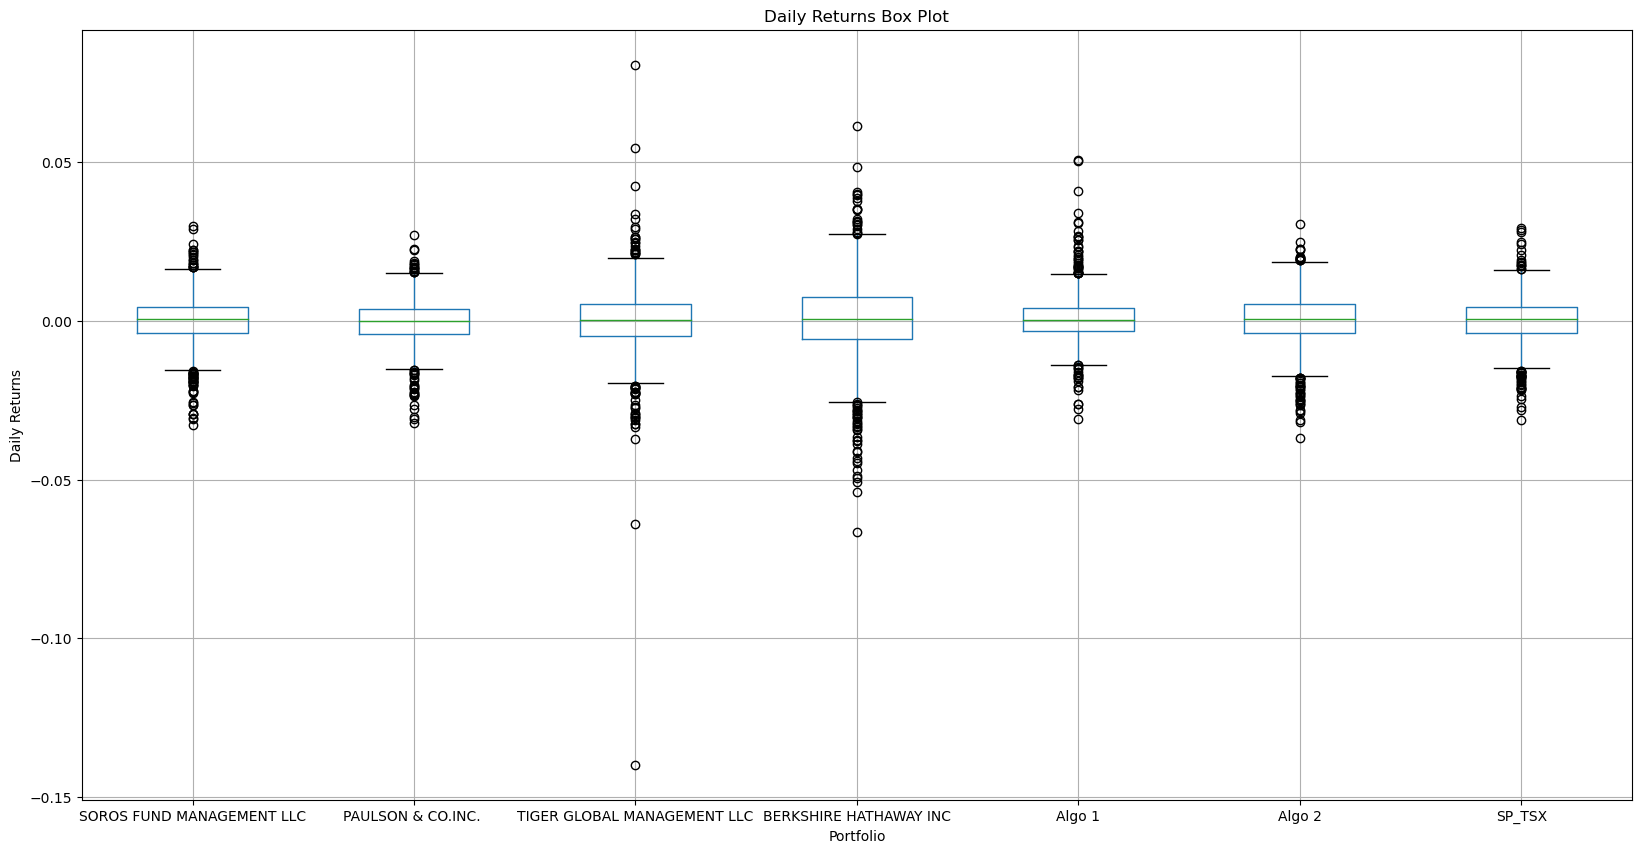

In [25]:
# Box plot to visually show risk
import matplotlib.pyplot as plt

# Create box plot of daily returns for all portfolios
combined_df.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP_TSX'], figsize=(20,10))



# Set title and axis labels
plt.title('Daily Returns Box Plot')
plt.xlabel('Portfolio')
plt.ylabel('Daily Returns')

# Display the plot
plt.show()


### Calculate Standard Deviations

In [26]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()

# Print the daily standard deviations of all portfolios
print(daily_std)


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX                         0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [27]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = combined_df['SP_TSX'].std()
print('Standard deviation of S&P TSX 60:', tsx_std)


# Determine which portfolios are riskier than the S&P TSX 60
combined_df.std() > tsx_std


Standard deviation of S&P TSX 60: 0.007034167748577725


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
SP_TSX                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print("Annualized Standard Deviation:")
print(annualized_std)

Annualized Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
dtype: float64


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

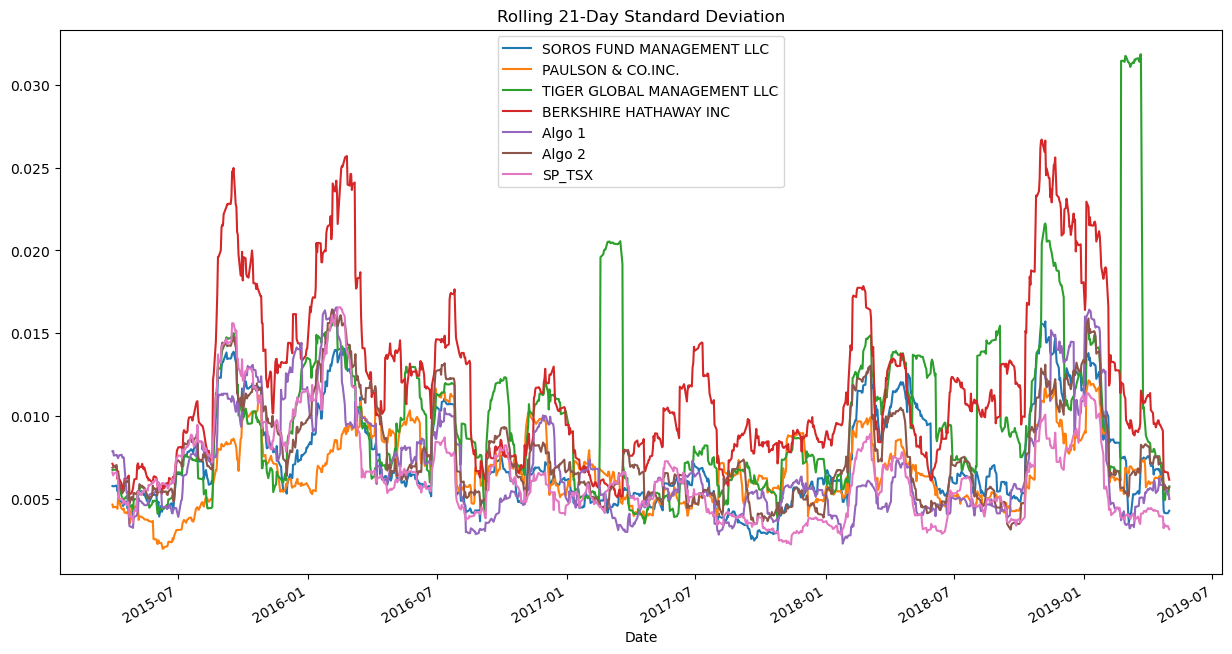

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window_size = 21
rolling_std = daily_returns.rolling(window_size).std()


# Plot the rolling standard deviation
rolling_std.plot(figsize=(15, 8), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [30]:
# Concatenate all DataFrames into a single DataFrame
all_returns_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis='columns', join='inner')

# Calculate correlation matrix
corr_matrix = all_returns_df.corr()

# Display correlation matrix
print(corr_matrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
Close                                         0.065582            0.057284   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2         

In [31]:
corr_matrix.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.065582
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.057284
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,-0.012292
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.067720
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,-0.054593
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.076330
Close,0.065582,0.057284,-0.012292,0.067720,-0.054593,0.076330,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [32]:
# Calculate covariance of a single portfolio
soros_returns = all_returns_df['SOROS FUND MANAGEMENT LLC']

covariance = soros_returns.cov(sp_tsx_df_daily_returns)
print(covariance)

# Calculate variance of S&P TSX
variance = sp_tsx_df_daily_returns.var()
print(variance)

# Computing beta
beta = covariance / variance
print(beta)

3.710689907855224e-05
4.405458170898365e-05
0.8422937555887716


In [33]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:title={'center':'Rolling 60-Day Beta: SOROS FUND MANAGEMENT LLC vs. S&P TSX 60'}, xlabel='Date'>

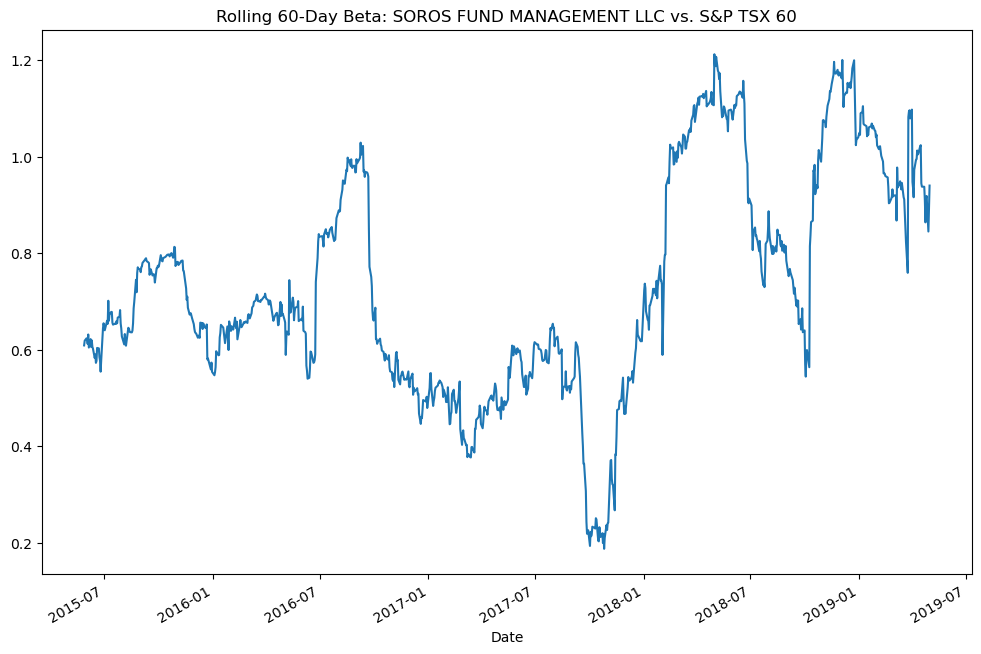

In [34]:
# Plot beta trend

# Calculate rolling 60-day covariance of SOROS FUND MANAGEMENT LLC portfolio and S&P TSX 60
rolling_cov = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df["SP_TSX"])

# Calculate rolling 60-day variance of S&P TSX 60
rolling_var = combined_df["SP_TSX"].rolling(window=60).var()

# Calculate rolling 60-day beta
rolling_beta = rolling_cov / rolling_var

# Plot rolling 60-day beta
rolling_beta.plot(figsize=(12,8), title='Rolling 60-Day Beta: SOROS FUND MANAGEMENT LLC vs. S&P TSX 60')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

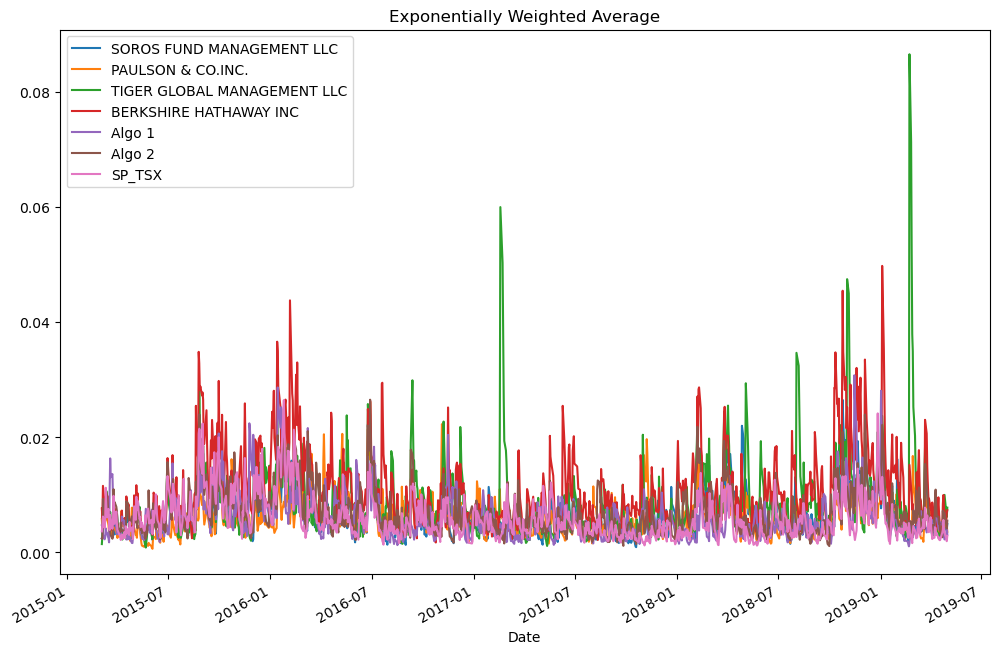

In [35]:
# Use `ewm` to calculate the rolling window
ewm_21d = combined_df.ewm(halflife='21 days', times=all_returns_df.index).std()

# Print the result
ewm_21d.plot(figsize=(12,8), title='Exponentially Weighted Average')

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

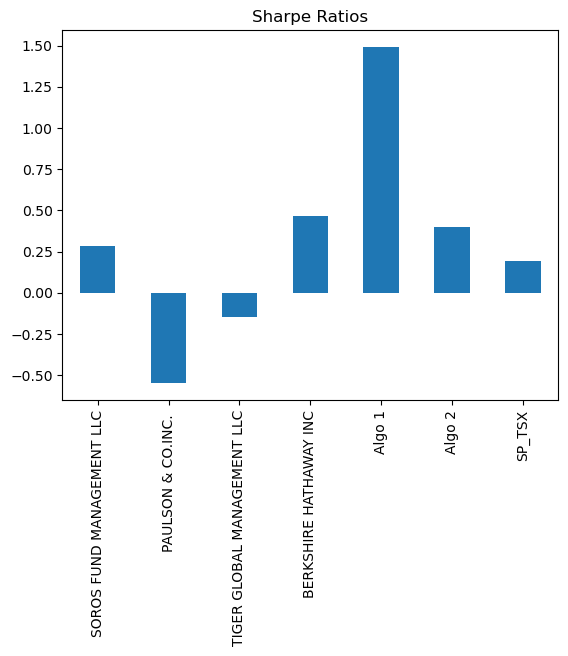

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

To determine if the algorithmic strategies outperform both the market and the whales portfolios, we can compare their Sharpe ratios. A higher Sharpe ratio indicates better risk-adjusted returns.

We can use the Sharpe ratio calculated earlier to compare the performance of the algorithmic strategies against the market and whales portfolios. If the Sharpe ratio of the algorithmic strategies is higher than the Sharpe ratio of both the market and whales portfolios, then we can say that the algorithmic strategies outperform both the market and the whales portfolios.

If we have not calculated the Sharpe ratios for the market and whales portfolios, we can calculate them using the same formula and then compare them to the Sharpe ratios of the algorithmic strategies.

Additionally, we can also perform a hypothesis test to check if the difference in Sharpe ratios between the algorithmic strategies and the market or whales portfolios is statistically significant. If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis that there is no difference in Sharpe ratios, and conclude that the algorithmic strategies perform better.---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [131]:
# Read in PETROCHINA.csv
petrochina_df = pd.read_csv('./resources/PETROCHINA.csv', index_col='Date', parse_dates=True)

In [132]:
# Read in EXXONMOBIL.csv
exxon_df = pd.read_csv('./resources/EXXONMOBIL.csv', index_col='Date', parse_dates=True)

In [133]:
# Read in TCPIPELINES.csv
tcpipe_df = pd.read_csv('./resources/TCPIPELINES.csv', index_col='Date', parse_dates=True)

In [134]:
# Read in CONOCOPHILLIPS.csv
conoco_df = pd.read_csv('./resources/CONOCOPHILLIPS.csv', index_col='Date', parse_dates=True)

In [135]:
# Combine all stocks in a single DataFrame
allstocks_df = pd.concat([petrochina_df, exxon_df, tcpipe_df, conoco_df], axis='columns', join='inner')

# Rename the columns
allstocks_df.columns = ['PETROCHINA', 'EXXON MOBIL ', 'TC PIPELINES', 'CONOCO PHILLIPS']

# Reset Date index
allstocks_df = allstocks_df.reset_index()

# remove the time component from the date column
allstocks_df['Date'] = allstocks_df['Date'].dt.date

allstocks_df = allstocks_df.set_index("Date")
allstocks_df

,PETROCHINA,EXXON MOBIL,TC PIPELINES,CONOCO PHILLIPS
Date,,,,
2015-07-22,1.03,81.79,37.85,55.83
2015-07-27,0.95,79.26,37.79,50.65
2015-07-28,0.95,82.48,38.15,52.24
2015-07-29,0.99,83.14,38.05,52.90
2015-07-31,1.01,79.21,38.91,50.34
...,...,...,...,...
2019-05-29,0.57,72.16,48.53,60.14
2019-05-31,0.55,70.77,48.68,58.96
2019-06-03,0.57,71.88,48.50,59.42


In [136]:
# Reorganize portfolio data by having a column per symbol
#all_stocks_df = all_stocks_df.drop('index', axis=1)
#all_stocks_df = all_stocks_df.reset_index()
#all_stocks_df = all_stocks_df.pivot(index='Date', columns=all_stocks_df.columns[2:], values='Close')


In [137]:
# Calculate Daily Returns
allstocks = allstocks_df.pct_change()
allstocks

,PETROCHINA,EXXON MOBIL,TC PIPELINES,CONOCO PHILLIPS
Date,,,,
2015-07-22,NaN,NaN,NaN,NaN
2015-07-27,-0.077670,-0.030933,-0.001585,-0.092782
2015-07-28,0.000000,0.040626,0.009526,0.031392
2015-07-29,0.042105,0.008002,-0.002621,0.012634
2015-07-31,0.020202,-0.047270,0.022602,-0.048393
...,...,...,...,...
2019-05-29,-0.017241,-0.044997,-0.008175,-0.046154
2019-05-31,-0.035088,-0.019263,0.003091,-0.019621
2019-06-03,0.036364,0.015685,-0.003698,0.007802


In [138]:
# Calculate daily returns
import matplotlib.pyplot as plt

In [139]:
# Drop NAs
allstocks.dropna(inplace=True)
allstocks

# Display sample data

,PETROCHINA,EXXON MOBIL,TC PIPELINES,CONOCO PHILLIPS
Date,,,,
2015-07-27,-0.077670,-0.030933,-0.001585,-0.092782
2015-07-28,0.000000,0.040626,0.009526,0.031392
2015-07-29,0.042105,0.008002,-0.002621,0.012634
2015-07-31,0.020202,-0.047270,0.022602,-0.048393
2015-08-06,-0.049505,-0.014140,-0.033410,-0.001192
...,...,...,...,...
2019-05-29,-0.017241,-0.044997,-0.008175,-0.046154
2019-05-31,-0.035088,-0.019263,0.003091,-0.019621
2019-06-03,0.036364,0.015685,-0.003698,0.007802


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [140]:
# Calculate the weighted returns for each stock

weights = np.array([0.25, 0.25, 0.25, 0.25])
weighted_returns = allstocks * weights

# Calculate the portfolio return as the sum of the weighted returns
portfolio_return = weighted_returns.sum(axis=1)

# Display the portfolio return
print(portfolio_return.head())

Date
2015-07-27   -0.050742
2015-07-28    0.020386
2015-07-29    0.015030
2015-07-31   -0.013215
2015-08-06   -0.024562
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [141]:
# Join your returns DataFrame to the original returns DataFrame
extracombined_df = pd.concat([portfolio_return, combined_df], axis='columns', join='inner').rename(columns={0:"Isabel Portfolio"})
extracombined_df

/Users/isabel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:347: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Isabel Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2015-07-27,-0.050742,-0.008946,-0.012591,-0.008107,-0.018804,-0.004581,-0.010166,-0.013032
2015-07-28,0.020386,0.008597,0.002159,0.007026,0.008163,0.010567,0.006345,0.005427
2015-07-29,0.015030,0.007662,0.003382,0.007917,0.003607,0.011992,0.003721,0.015943
2015-07-31,-0.013215,-0.002888,-0.001039,-0.001834,-0.000192,-0.003018,0.003568,0.005956
2015-08-06,-0.024562,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,-0.006694
...,...,...,...,...,...,...,...,...
2019-04-08,0.012249,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.000679
2019-04-16,-0.014309,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.000803
2019-04-18,-0.002436,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145


In [142]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
extracombined_df

,Isabel Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2015-07-27,-0.050742,-0.008946,-0.012591,-0.008107,-0.018804,-0.004581,-0.010166,-0.013032
2015-07-28,0.020386,0.008597,0.002159,0.007026,0.008163,0.010567,0.006345,0.005427
2015-07-29,0.015030,0.007662,0.003382,0.007917,0.003607,0.011992,0.003721,0.015943
2015-07-31,-0.013215,-0.002888,-0.001039,-0.001834,-0.000192,-0.003018,0.003568,0.005956
2015-08-06,-0.024562,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,-0.006694
...,...,...,...,...,...,...,...,...
2019-04-08,0.012249,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.000679
2019-04-16,-0.014309,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.000803
2019-04-18,-0.002436,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [143]:
# Calculate the daily standard deviations of all portfolios
portfolio_return.std()

0.026741513069825012

In [144]:
# Calculate the annualized `std`
annualized_std = portfolio_return.std() * np.sqrt(252)
print("Annualized Standard Deviation:")
print(annualized_std)

Annualized Standard Deviation:
0.4245083595860425


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

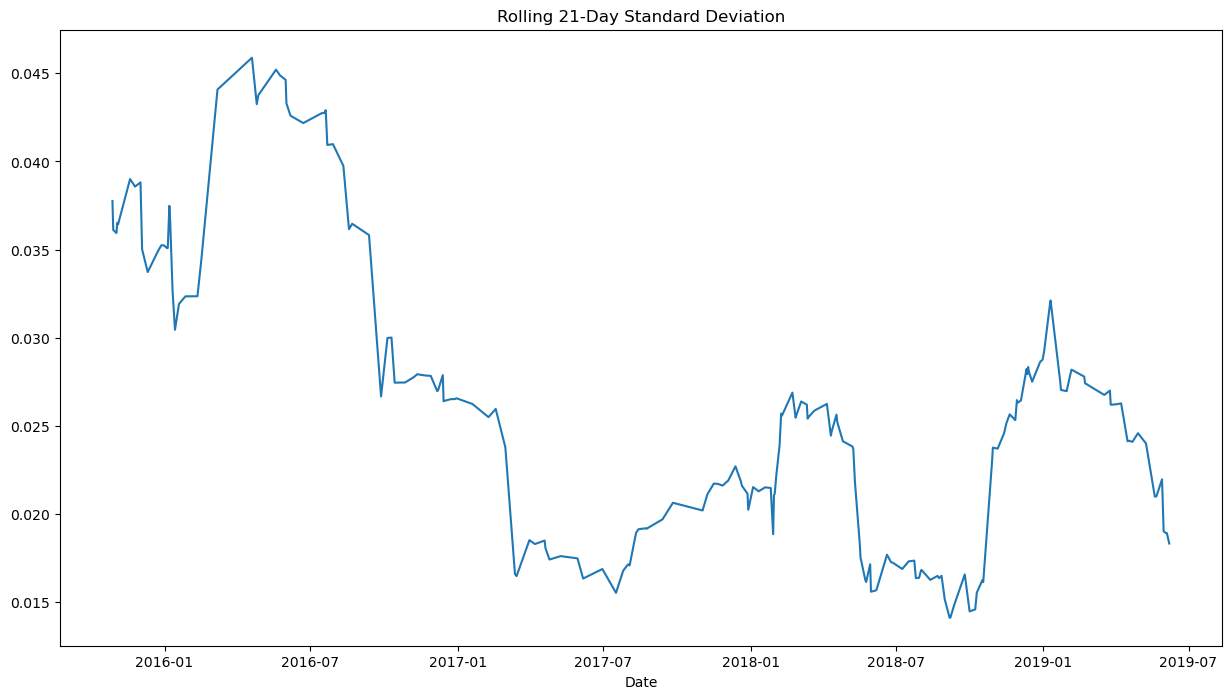

In [145]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window_size = 21
rolling_std = portfolio_return.rolling(window_size).std()


# Plot the rolling standard deviation
rolling_std.plot(figsize=(15, 8), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

In [146]:
# Calculate and plot the correlation
extracombined_df.corr()

,Isabel Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Isabel Portfolio,1.000000,0.246950,0.199130,0.055478,0.136541,0.160520,0.329111,0.376011
SOROS FUND MANAGEMENT LLC,0.246950,1.000000,0.752595,0.473090,0.756303,0.284667,0.847401,0.735423
PAULSON & CO.INC.,0.199130,0.752595,1.000000,0.355289,0.563037,0.333676,0.736410,0.614263
TIGER GLOBAL MANAGEMENT LLC,0.055478,0.473090,0.355289,1.000000,0.289361,0.093515,0.374113,0.374568
BERKSHIRE HATHAWAY INC,0.136541,0.756303,0.563037,0.289361,1.000000,0.220086,0.706043,0.630012
Algo 1,0.160520,0.284667,0.333676,0.093515,0.220086,1.000000,0.315931,0.280359
Algo 2,0.329111,0.847401,0.736410,0.374113,0.706043,0.315931,1.000000,0.770327
SP_TSX,0.376011,0.735423,0.614263,0.374568,0.630012,0.280359,0.770327,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [147]:
extracombined_df

,Isabel Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2015-07-27,-0.050742,-0.008946,-0.012591,-0.008107,-0.018804,-0.004581,-0.010166,-0.013032
2015-07-28,0.020386,0.008597,0.002159,0.007026,0.008163,0.010567,0.006345,0.005427
2015-07-29,0.015030,0.007662,0.003382,0.007917,0.003607,0.011992,0.003721,0.015943
2015-07-31,-0.013215,-0.002888,-0.001039,-0.001834,-0.000192,-0.003018,0.003568,0.005956
2015-08-06,-0.024562,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,-0.006694
...,...,...,...,...,...,...,...,...
2019-04-08,0.012249,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.000679
2019-04-16,-0.014309,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,-0.000803
2019-04-18,-0.002436,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145


<AxesSubplot:title={'center':'Rolling 60-Day Beta: ISABEL PORTFOLIO vs. S&P TSX 60'}, xlabel='Date'>

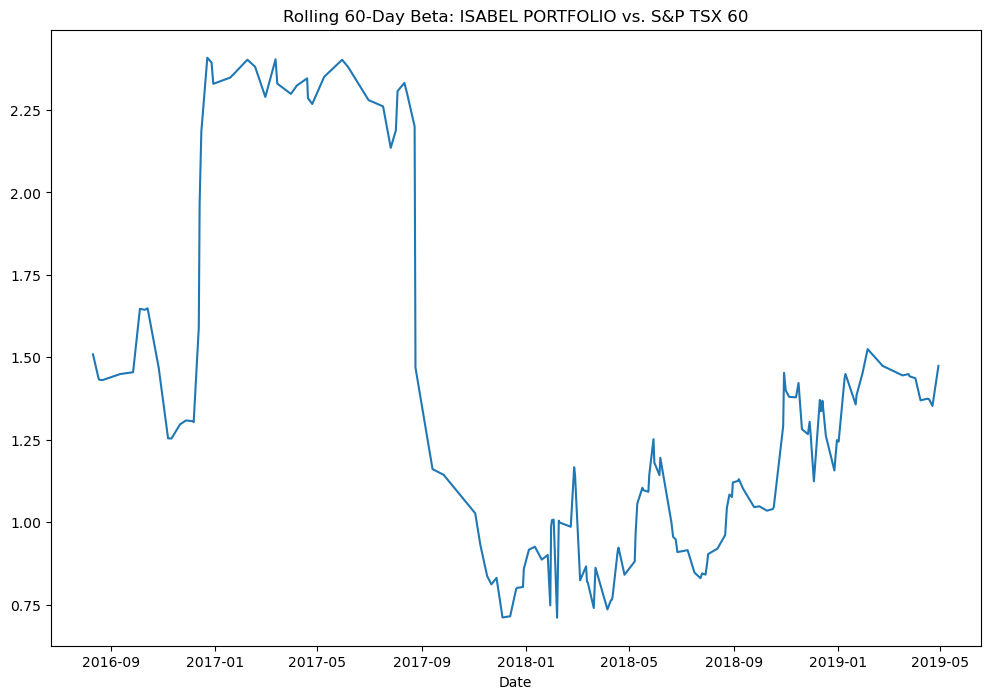

In [148]:
#Plot beta trend

# Calculate rolling 60-day covariance of SOROS FUND MANAGEMENT LLC portfolio and S&P TSX 60
rolling_cov = extracombined_df["Isabel Portfolio"].rolling(window=60).cov(extracombined_df["SP_TSX"])

# Calculate rolling 60-day variance of S&P TSX 60
rolling_var = extracombined_df["SP_TSX"].rolling(window=60).var()

# Calculate rolling 60-day beta
rolling_beta = rolling_cov / rolling_var

# Plot rolling 60-day beta
rolling_beta.plot(figsize=(12,8), title='Rolling 60-Day Beta: ISABEL PORTFOLIO vs. S&P TSX 60')

In [149]:
# Calculate and plot Beta
beta = covariance / variance
print(beta)

0.8422937555887716


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [150]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (extracombined_df.mean() * 252) / (extracombined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

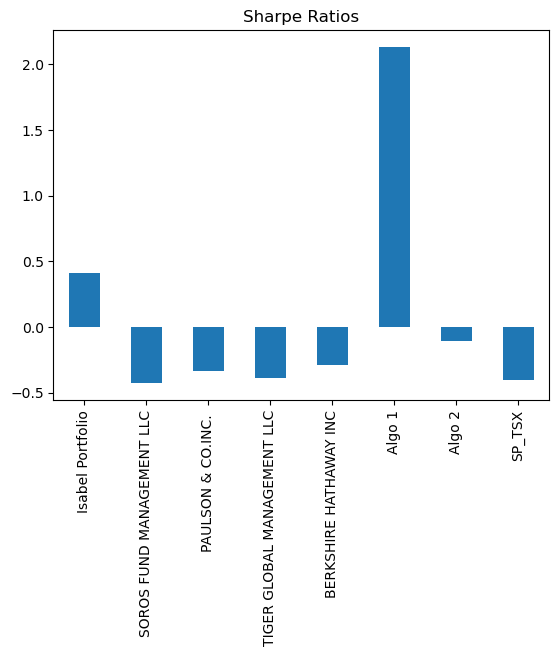

In [151]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
Isabel's portfolio has a higher Sharpe ratio than all the other stocks, except for Algo1 which has the highest Sharpe ratio of 2.0. This means that Isabel's portfolio has a higher risk-adjusted return compared to the other stocks. 

Isabel's portfolio has a beta of 0.842, which is higher than the betas of the other stocks. This indicates that Isabel's portfolio is more sensitive to market movements than the other stocks.

Looking at the 60-day rolling beta, we can see that Isabel's portfolio generally has a higher beta compared to the other stocks, except for some instances where some of the other stocks have higher betas. This suggests that Isabel's portfolio is generally more volatile compared to the other stocks.

Isabel's portfolio is out-performed by Algo1. 

It is important to note that past performance is not indicative of future results.